# Project background and justification: 
This project grew out of the desire to combine digital humanities practices with structuralist analyses of Chekhov's short stories. As such, I engaged with John Sturrock and Jean-Michele Rabalé's overview of structuralism and the definition of structuralism as allowing the researcher to understand a text as part of a larger system. I am considering the collected works of Chekhov's short stories (over 500 individual stories) as the Chekhovian short story system. 
The structuralist claims that inspired this project come from the following sources: 
John Tullock, Chekhov: A Structuralist Study
Thomas Winner, Chekhov and His Prose
Alexander Chudakov, Chekhov's Poetics
Radislav Lapushin, Dew on the Grass: The Poetics of Inbetweeness in Chekhov
L.S.K. le Fleming: The Structural Role of Language in Chekhov's Later Stories

# Corpus creation and definition:
I have chosen to utilize the complete collection of Chekhov's work compiled digitally on the site lib.ru by V. Esaulov in 2006. The text consists of 10 volumes of short stories (part of 18 volumes in the complete work). For a list of all the stories included in these volumes, see: http://az.lib.ru/c/chehow_a_p/text_1000.shtml

Preparing and cleaning texts in Voyant: I have utilized .fb2 files converted to .xml downloaded from http://az.lib.ru/c/chehow_a_p/. I uploaded each volume to Voyant to divide the texts by short story and to download the corpus as plain text files. To do this, I utilized Voyant's built in XML functionality to define xpaths to break the document by section .xml elements and in the process learned about namespaces in xml schemas. I utilized the xpath: //*[local-name()='section'] to break up the documents.

In [515]:
from nltk.corpus import PlaintextCorpusReader#create Chekhov Corpus for use with nltk
ChekhovCorpus = PlaintextCorpusReader("/Users/kaylinland/llcu612/ChekhovFiles/ChekhovAll", ".*txt")
len(ChekhovCorpus.fileids())

586

# Investigation 1: Adjective Counts
Chekhov's use of adjectives has been the topic of two recent dissertations published in Russian. In their work on adjectives used to describe people in Chekhov's work, L. Tun cites several researchers dealing with the "adjective question". K. S. Gorbachevich claims Chekhov's use of semantically related adjectives provides grounds for studying synonyms. Gorbachevich identifies that Chekhov often uses synonyms to relate differing levels of meaning in his work. For example, the adjectives хороший, красивый, хорошенький reveal different semantic and stylistic meanings. 
Inspired by this work, I decided to identify the most frequently used adjectives in Chekhov's work and identify patterns in his adjective usage. The code I used to do so is as follows:

In [258]:
from pymystem3 import Mystem#Mystem provides grammatical analysis using a corpus curated from Yandex (Russia's Google). pymystem3 is the Python module for Mystem
import os
import glob
import nltk
import pprint
import re
%matplotlib inline
import matplotlib.pyplot as plt

def process_text_pos(filetext): 
    ### this returns a dictionary of all the words used in the filetext
    m = Mystem() #create Mystem object
    mAnalyzed = m.analyze(filetext);#creates dictionary with words used in text and POS info
    mPOS = POSdict(mAnalyzed)#runs function defined below to remove extra info from dictionary and keep only text and POS info
    adj_dict = dict()#defines adj_dict as dictionary
    for key, value in mPOS.items():#looks at dictionary w/ text and POS to find only adjectives
        if value[0:2] == "A=":#if value is adjective, key is added to dictionary as lowercase string
            adj_dict[str(key).lower()] = 0 
    return adj_dict # returns a dictionary of the adjectives, all lowercase, with a value of zero

def POSdict(file):#this function runs grammatical analysis on words in file and returns dictionary with just word,POS
    newDict = dict()#create blank dictionary
    for i in file: 
        word = str(i.get('text')).strip().lower()#define individual word stripped of punctuation and lower case
        pos = ''#iterate list
        for key,value in i.items():#for items in dictionary
            if key =='analysis':
                if (value): 
                    if ('gr' in value[0].keys()) :#if value for gr then define POS as value
                        pos = (value[0].get('gr'))#value will equal text in "gr"
                    else : 
                        pos = 'NO gr IN ANALYZER'#if not value print there is no grammar in analyzer
                else : 
                    pos = 'WORD NOT FOUND IN ANALYZER'#if there was no analysis (word was not found in MyStem)
            if word!= '' and word != '\n':#=
                newDict[word] = pos
    #pprint.pprint(newDict, width=1)
    return(newDict)#create new dictionary with word, POS as key, value

def read_file(file):#quick function for reading file text
    f = open(file, "r")
    filetext = f.read()
    f.close()
    return filetext 

def regex_word_count(filestring, word):
    #findstring = "\b" + word + "\b"#use word boundaries to find words in string
    #findstring = "/^[\w']$/"
    return sum(1 for match in re.finditer(r"\b"+word+r"\b", filestring))

def process_files(listfiles):
    adjcounts = dict()#create new dictionary
    for file in listfiles:#for file in list of all files
        filetext = read_file(file)#use read file function to open file
        print("Analyzing " + file[38:])#keep track of printout [:38] to avoid printing full file path
        adjcounts = {**adjcounts, **process_text_pos(filetext)}#combine adjcounts dictionary and dictionary with all adjs
        
    for file in listfiles:
        filetext = read_file(file)
        print("Count adjectives in " + file[38:]) 
        for key, value in adjcounts.items():#for item in adjcounts dictionary
            adjcounts[key] = adjcounts.get(key) + regex_word_count(filetext.lower(), key)#adds value of 1 if word matches
    return adjcounts

In [74]:
text = "Такая милая, малая женщина"#this is to check that regex is working properly
regex_word_count(text, "мал")#it is

0

In order to make some sense of Chekhov's use of adjectives very broadly, I have performed some basic analysis using the Collocate and Getting Graphical Jupyter notebooks as my guides. 

In [516]:
print("Number of words in all Chekhov stories: ", len(theText))
print("Number of adjectives in Chekhov stories: ", len(chekhov_adjcounts))
print("Ratio of adjectives to words: ", len(chekhov_adjcounts)/len(theText))
freqdist = nltk.FreqDist(theText)
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("Russian")
textNostops = [word for word in theText if word not in stopwords]
freqdistNostops = nltk.FreqDist(textNostops)
freqdistNostops.tabulate(10)

Number of words in all Chekhov stories:  1846472
Number of adjectives in Chekhov stories:  18862
Ratio of adjectives to words:  0.010215156254738766
    это     всё  сказал   очень человек   глаза   время    лицо   около говорит 
   9712    5660    4520    2528    2412    2272    2120    2052    1756    1752 


I can see that Chekhov's ration of adjectives to other words (as calculated using the adjective list I compiled below) is relatively low. I would be interested in expanding this analysis to include a comparison corpus that would allow me to identify how Chekhov's adjective usage compares to other authors in Russian. 

In [75]:
chekhov_adjcounts = process_files(glob.glob("/Users/kaylinland/llcu612/ChekhovFiles/ChekhovAll/*txt"))#run my function on all files 

Analyzing /ChekhovAll/КОЗЕЛ ИЛИ НЕГОДЯЙ.unknown.txt
Analyzing /ChekhovAll/СЛОВОТОЛКОВАТЕЛЬ ДЛЯ БАРЫ.unknown.txt
Analyzing /ChekhovAll/РАЗ В ГОД.unknown.txt
Analyzing /ChekhovAll/МЕЛЮЗГА.unknown.txt
Analyzing /ChekhovAll/ЦИНИК.unknown.txt
Analyzing /ChekhovAll/ГОВОРИТЬ ИЛИ МОЛЧАТЬ.unknown.txt
Analyzing /ChekhovAll/САПОЖНИК И НЕЧИСТАЯ СИЛА.unknown.txt
Analyzing /ChekhovAll/ЗАДАЧА.unknown.txt
Analyzing /ChekhovAll/НЕПРИЯТНАЯ ИСТОРИЯ.unknown.txt
Analyzing /ChekhovAll/ЖИЛЕЦ.unknown.txt
Analyzing /ChekhovAll/В РОЖДЕСТВЕНСКУЮ НОЧЬ.unknown.txt
Analyzing /ChekhovAll/БЛАГОДАРНЫЙ.unknown.txt
Analyzing /ChekhovAll/РАНО.unknown.txt
Analyzing /ChekhovAll/НЕСООБРАЗНЫЕ МЫСЛИ Расск.unknown.txt
Analyzing /ChekhovAll/РАДОСТЬ.unknown.txt
Analyzing /ChekhovAll/ЗАБЛУДШИЕ.unknown.txt
Analyzing /ChekhovAll/ЛЮБОВЬ.unknown.txt
Analyzing /ChekhovAll/ДЛИННЫЙ ЯЗЫК.unknown.txt
Analyzing /ChekhovAll/ВАНЬКА.unknown.txt
Analyzing /ChekhovAll/АПТЕКАРША.unknown.txt
Analyzing /ChekhovAll/СИРЕНА.unknown.txt
Analyzing /Che

Analyzing /ChekhovAll/III ПИСЬМО.unknown.txt
Analyzing /ChekhovAll/ЧЕРНЫЙ МОНАХ.unknown.txt
Analyzing /ChekhovAll/СТЕПЬ.unknown.txt
Analyzing /ChekhovAll/НА ПУТИ.unknown.txt
Analyzing /ChekhovAll/НЕДОБРАЯ НОЧЬ.unknown.txt
Analyzing /ChekhovAll/КОРРЕСПОНДЕНТ.unknown.txt
Analyzing /ChekhovAll/ОТРАВА.unknown.txt
Analyzing /ChekhovAll/ЧЕЛОВЕК В ФУТЛЯРЕ.unknown.txt
Analyzing /ChekhovAll/КРАТКАЯ АНАТОМИЯ ЧЕЛОВЕКА.unknown.txt
Analyzing /ChekhovAll/ЧТО ЛУЧШЕ.unknown.txt
Analyzing /ChekhovAll/И ТО И СЕ - 1.unknown.txt
Analyzing /ChekhovAll/РУССКИЙ УГОЛЬ.unknown.txt
Analyzing /ChekhovAll/ОТРЫВОК.unknown.txt
Analyzing /ChekhovAll/ДРАМА.unknown.txt
Analyzing /ChekhovAll/ГОСТЬ.unknown.txt
Analyzing /ChekhovAll/ЗЕРКАЛО.unknown.txt
Analyzing /ChekhovAll/ТАПЕР.unknown.txt
Analyzing /ChekhovAll/ИОНЫЧ.unknown.txt
Analyzing /ChekhovAll/ГЛУПЫЙ ФРАНЦУЗ.unknown.txt
Analyzing /ChekhovAll/ЗИНОЧКА.unknown.txt
Analyzing /ChekhovAll/НА ВОЛЧЬЕЙ САДКЕ.unknown.txt
Analyzing /ChekhovAll/НА ГВОЗДЕ.unknown.txt
Analyzi

Analyzing /ChekhovAll/КТО ВИНОВАТ.unknown.txt
Analyzing /ChekhovAll/ДВАДЦАТЬ ДЕВЯТОЕ ИЮНЯ.unknown.txt
Analyzing /ChekhovAll/ОТЕЦ СЕМЕЙСТВА.unknown.txt
Analyzing /ChekhovAll/СКВЕРНАЯ ИСТОРИЯ.unknown.txt
Analyzing /ChekhovAll/ДЕЛЕЦ.unknown.txt
Analyzing /ChekhovAll/РЫБЬЯ ЛЮБОВЬ.unknown.txt
Analyzing /ChekhovAll/ГОРДЫЙ ЧЕЛОВЕК.unknown.txt
Analyzing /ChekhovAll/НЕУДАЧНЫЙ ВИЗИТ.unknown.txt
Analyzing /ChekhovAll/О ЖЕНЩИНЫ ЖЕНЩИНЫ.unknown.txt
Analyzing /ChekhovAll/АННА НА ШЕЕ.unknown.txt
Analyzing /ChekhovAll/РАЗМАЗНЯ.unknown.txt
Analyzing /ChekhovAll/ЗЛОУМЫШЛЕННИК.unknown.txt
Analyzing /ChekhovAll/БЕГЛЕЦ.unknown.txt
Analyzing /ChekhovAll/ИЗ ДНЕВНИКА ПОМОЩНИКА БУХ.unknown.txt
Analyzing /ChekhovAll/БАБЫ.unknown.txt
Analyzing /ChekhovAll/БРАК ЧЕРЕЗ 10 15 ЛЕТ -.unknown.txt
Analyzing /ChekhovAll/ОГНИ.unknown.txt
Analyzing /ChekhovAll/МАЙОНЕЗ.unknown.txt
Analyzing /ChekhovAll/СУД.unknown.txt
Analyzing /ChekhovAll/ПЕТРОВ ДЕНЬ.unknown.txt
Analyzing /ChekhovAll/ТЕМНОТА.unknown.txt
Analyzing /ChekhovA

Analyzing /ChekhovAll/ЗАБЫЛ.unknown.txt
Analyzing /ChekhovAll/3000 ИНОСТРАННЫХ СЛОВ.unknown.txt
Analyzing /ChekhovAll/МУЖИКИ - 1.unknown.txt
Analyzing /ChekhovAll/ОТКРЫТИЕ.unknown.txt
Analyzing /ChekhovAll/СПАТЬ ХОЧЕТСЯ.unknown.txt
Analyzing /ChekhovAll/К СВЕДЕНИЮ МУЖЕЙ.unknown.txt
Analyzing /ChekhovAll/ВОСКЛИЦАТЕЛЬНЫЙ ЗНАК.unknown.txt
Analyzing /ChekhovAll/СЧАСТЛИВЧИК.unknown.txt
Analyzing /ChekhovAll/ГУСИНЫЙ РАЗГОВОР.unknown.txt
Analyzing /ChekhovAll/СКАЗКА.unknown.txt
Analyzing /ChekhovAll/В ЛАНДО.unknown.txt
Analyzing /ChekhovAll/В СУДЕ.unknown.txt
Analyzing /ChekhovAll/МУЖИКИ.unknown.txt
Analyzing /ChekhovAll/ВОДЕВИЛЬ.unknown.txt
Analyzing /ChekhovAll/ТЕМНОЮ НОЧЬЮ.unknown.txt
Analyzing /ChekhovAll/О ДРАМЕ.unknown.txt
Analyzing /ChekhovAll/БЕНЕФИС СОЛОВЬЯ.unknown.txt
Analyzing /ChekhovAll/ЕДИНСТВЕННОЕ СРЕДСТВО.unknown.txt
Analyzing /ChekhovAll/ОБЩЕЕ ОБРАЗОВАНИЕ.unknown.txt
Analyzing /ChekhovAll/КЛЕВЕТА.unknown.txt
Analyzing /ChekhovAll/ИДИЛЛИЯ.unknown.txt
Analyzing /ChekhovAll/КАЛЕ

Count adjectives in /ChekhovAll/ИЗ ДНЕВНИКА ОДНОЙ ДЕВИЦЫ.unknown.txt
Count adjectives in /ChekhovAll/ДЕЛО О 1884 ГОДЕ.unknown.txt
Count adjectives in /ChekhovAll/ПАТРИОТ СВОЕГО ОТЕЧЕСТВА.unknown.txt
Count adjectives in /ChekhovAll/ДОЧЬ КОММЕРЦИИ СОВЕТНИКА.unknown.txt
Count adjectives in /ChekhovAll/ИНДЕЙСКИЙ ПЕТУХ.unknown.txt
Count adjectives in /ChekhovAll/СРЕДСТВО ОТ ЗАПОЯ.unknown.txt
Count adjectives in /ChekhovAll/БАРЫНЯ.unknown.txt
Count adjectives in /ChekhovAll/МЕЧТЫ.unknown.txt
Count adjectives in /ChekhovAll/НЕДОБРОЕ ДЕЛО.unknown.txt
Count adjectives in /ChekhovAll/БУМАЖНИК.unknown.txt
Count adjectives in /ChekhovAll/ВОЛОДЯ.unknown.txt
Count adjectives in /ChekhovAll/ИНТРИГИ.unknown.txt
Count adjectives in /ChekhovAll/ТАЙНА.unknown.txt
Count adjectives in /ChekhovAll/ХАМЕЛЕОН.unknown.txt
Count adjectives in /ChekhovAll/ЮБИЛЕЙ.unknown.txt
Count adjectives in /ChekhovAll/ИЗ ОГНЯ ДА В ПОЛЫМЯ.unknown.txt
Count adjectives in /ChekhovAll/ЖИТЕЙСКИЕ НЕВЗГОДЫ.unknown.txt
Count adjectiv

Count adjectives in /ChekhovAll/ХУДОЖЕСТВО.unknown.txt
Count adjectives in /ChekhovAll/УМНЫЙ ДВОРНИК.unknown.txt
Count adjectives in /ChekhovAll/ТРИ ГОДА.unknown.txt
Count adjectives in /ChekhovAll/КРАСНАЯ ГОРКА.unknown.txt
Count adjectives in /ChekhovAll/ДИПЛОМАТ.unknown.txt
Count adjectives in /ChekhovAll/ИЗ ЗАПИСОК ВСПЫЛЬЧИВОГО Ч.unknown.txt
Count adjectives in /ChekhovAll/РОМАН С КОНТРАБАСОМ.unknown.txt
Count adjectives in /ChekhovAll/ЗА ДВУМЯ ЗАЙЦАМИ ПОГОНИШЬ.unknown.txt
Count adjectives in /ChekhovAll/МЫСЛИТЕЛЬ е.unknown.txt
Count adjectives in /ChekhovAll/ВВЕРХ ПО ЛЕСТНИЦЕ.unknown.txt
Count adjectives in /ChekhovAll/ТЕЩА-АДВОКАТ.unknown.txt
Count adjectives in /ChekhovAll/ЗНАКОМЫЙ МУЖЧИНА.unknown.txt
Count adjectives in /ChekhovAll/ОБЕР-ВЕРХИ.unknown.txt
Count adjectives in /ChekhovAll/ЗАВЕЩАНИЕ СТАРОГО 1883-го.unknown.txt
Count adjectives in /ChekhovAll/В НОМЕРАХ.unknown.txt
Count adjectives in /ChekhovAll/КАЛХАС.unknown.txt
Count adjectives in /ChekhovAll/ЛЕВ И СОЛНЦЕ.unknown.

Count adjectives in /ChekhovAll/ТОЛСТЫЙ И ТОНКИЙ.unknown.txt
Count adjectives in /ChekhovAll/ЖИВАЯ ХРОНОЛОГИЯ.unknown.txt
Count adjectives in /ChekhovAll/В ЦИРУЛЬНЕ.unknown.txt
Count adjectives in /ChekhovAll/САЛОН ДЕ ВАРЬЕТЕ.unknown.txt
Count adjectives in /ChekhovAll/ДАЧНИКИ.unknown.txt
Count adjectives in /ChekhovAll/РЫЦАРИ БЕЗ СТРАХА И УПРЕК.unknown.txt
Count adjectives in /ChekhovAll/МАЛЬЧИКИ.unknown.txt
Count adjectives in /ChekhovAll/КРЕСТ.unknown.txt
Count adjectives in /ChekhovAll/ОСЕНЬЮ.unknown.txt
Count adjectives in /ChekhovAll/ВЕРОЧКА.unknown.txt
Count adjectives in /ChekhovAll/КРИВОЕ ЗЕРКАЛО.unknown.txt
Count adjectives in /ChekhovAll/НЕРВЫ.unknown.txt
Count adjectives in /ChekhovAll/МАСЛЕНИЧНЫЕ ПРАВИЛА ДИСЦИ.unknown.txt
Count adjectives in /ChekhovAll/ДРАМАТУРГ.unknown.txt
Count adjectives in /ChekhovAll/ВЕРБА.unknown.txt
Count adjectives in /ChekhovAll/СОБЫТИЕ.unknown.txt
Count adjectives in /ChekhovAll/СОВРЕМЕННЫЕ МОЛИТВЫ.unknown.txt
Count adjectives in /ChekhovAll/ГОР

Count adjectives in /ChekhovAll/ВЕДЬМА.unknown.txt
Count adjectives in /ChekhovAll/ПСИХОПАТЫ.unknown.txt
Count adjectives in /ChekhovAll/ЗАБЫЛ.unknown.txt
Count adjectives in /ChekhovAll/3000 ИНОСТРАННЫХ СЛОВ.unknown.txt
Count adjectives in /ChekhovAll/МУЖИКИ - 1.unknown.txt
Count adjectives in /ChekhovAll/ОТКРЫТИЕ.unknown.txt
Count adjectives in /ChekhovAll/СПАТЬ ХОЧЕТСЯ.unknown.txt
Count adjectives in /ChekhovAll/К СВЕДЕНИЮ МУЖЕЙ.unknown.txt
Count adjectives in /ChekhovAll/ВОСКЛИЦАТЕЛЬНЫЙ ЗНАК.unknown.txt
Count adjectives in /ChekhovAll/СЧАСТЛИВЧИК.unknown.txt
Count adjectives in /ChekhovAll/ГУСИНЫЙ РАЗГОВОР.unknown.txt
Count adjectives in /ChekhovAll/СКАЗКА.unknown.txt
Count adjectives in /ChekhovAll/В ЛАНДО.unknown.txt
Count adjectives in /ChekhovAll/В СУДЕ.unknown.txt
Count adjectives in /ChekhovAll/МУЖИКИ.unknown.txt
Count adjectives in /ChekhovAll/ВОДЕВИЛЬ.unknown.txt
Count adjectives in /ChekhovAll/ТЕМНОЮ НОЧЬЮ.unknown.txt
Count adjectives in /ChekhovAll/О ДРАМЕ.unknown.txt
Cou

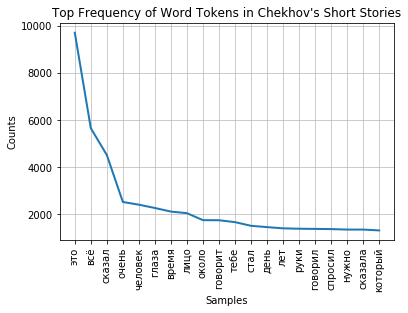

In [260]:
%matplotlib inline
freqdistNostops.plot(20, title="Top Frequency of Word Tokens in Chekhov's Short Stories")

This project gave me a valuable space to practice using NLTK with Russian texts and discovering both the possibilities and limitations of NLTK. I used NLTK's built in Russian stop word list to find the most commonly used words in Chekhov's short stories. 

In [517]:
pprint.pprint(chekhov_adjcounts)#list of all adjs Chekhov uses with their counts

{'абонементные': 2,
 'абонементных': 1,
 'абрикосовской': 1,
 'абсолютная': 1,
 'абсолютное': 1,
 'абсолютном': 1,
 'абсолютный': 1,
 'абстрактное': 1,
 'авантажное': 1,
 'августинский': 1,
 'августовская': 3,
 'августовский': 7,
 'августовскую': 2,
 'австралийскими': 1,
 'австралийских': 1,
 'австрийские': 2,
 'австрийский': 2,
 'австрийских': 1,
 'австрийского': 1,
 'авторитетно': 4,
 'авторитетное': 1,
 'авторитетный': 1,
 'авторитетным': 1,
 'авторский': 1,
 'авторским': 1,
 'авторского': 2,
 'авторское': 3,
 'авторской': 1,
 'авторском': 1,
 'авторскому': 1,
 'агентская': 1,
 'агентской': 1,
 'агрономической': 1,
 'адвокатская': 2,
 'адвокатскими': 1,
 'адвокатском': 1,
 'административное': 1,
 'административном': 1,
 'административный': 2,
 'административным': 1,
 'адмиралтейский': 1,
 'адмиральский': 1,
 'адресном': 2,
 'адские': 1,
 'адским': 1,
 'адское': 2,
 'адской': 1,
 'азартная': 1,
 'азартные': 2,
 'азбучны': 1,
 'азиатские': 1,
 'азиатской': 2,
 'азиатскою': 1,
 'азовск

 'бритыми': 4,
 'бритых': 2,
 'бродяжеское': 1,
 'бродячая': 3,
 'бродячей': 1,
 'бродячий': 2,
 'бромистого': 2,
 'бромистые': 1,
 'бромистый': 5,
 'бромистым': 4,
 'бронзовая': 1,
 'бронзового': 7,
 'бронзовой': 3,
 'бронзовому': 2,
 'бронзовую': 1,
 'бронзовые': 2,
 'бронзовый': 2,
 'бросовая': 1,
 'брудастых': 1,
 'брызжущая': 1,
 'брыластому': 1,
 'брюссельским': 1,
 'брюханский': 1,
 'брюшной': 1,
 'брюшным': 1,
 'бубнового': 2,
 'бубновому': 1,
 'бубновский': 1,
 'бугорчатый': 1,
 'бугорчатых': 1,
 'бугристое': 1,
 'будничная': 2,
 'будничного': 1,
 'будничное': 1,
 'будничной': 3,
 'будничную': 3,
 'будущего': 29,
 'будущей': 15,
 'будущем': 47,
 'будущие': 3,
 'будущий': 9,
 'будущим': 3,
 'будущих': 6,
 'будущую': 2,
 'буен': 2,
 'буйная': 2,
 'буйного': 1,
 'буйную': 1,
 'буйные': 1,
 'буйный': 1,
 'буйными': 1,
 'буквального': 1,
 'буковые': 1,
 'булавочная': 1,
 'булавочными': 1,
 'буланая': 1,
 'буланого': 1,
 'булочных': 1,
 'бульварная': 1,
 'бульварной': 2,
 'бульварны

 'генерального': 1,
 'генеральной': 1,
 'генеральская': 7,
 'генеральские': 2,
 'генеральский': 8,
 'генеральским': 2,
 'генеральского': 1,
 'генеральской': 3,
 'генеральском': 1,
 'генеральскому': 1,
 'гениальная': 1,
 'гениальнейшую': 1,
 'гениальное': 2,
 'гениальные': 2,
 'гениальный': 2,
 'гениальным': 1,
 'гениальных': 1,
 'географический': 1,
 'географических': 1,
 'географического': 2,
 'географическое': 1,
 'географической': 1,
 'геометрических': 1,
 'геральдическое': 1,
 'гербовой': 2,
 'гербовому': 1,
 'гербовую': 1,
 'гербовые': 2,
 'гербовый': 1,
 'германский': 1,
 'героическим': 1,
 'геройское': 1,
 'герцогским': 1,
 'гибельна': 1,
 'гибельны': 1,
 'гибельные': 1,
 'гибка': 3,
 'гибкая': 2,
 'гибки': 1,
 'гибкие': 1,
 'гибким': 1,
 'гибкое': 1,
 'гибок': 2,
 'гигантских': 2,
 'гигантского': 2,
 'гигиенические': 1,
 'гигиенических': 1,
 'гималайский': 3,
 'гималайское': 2,
 'гимназическая': 1,
 'гимназические': 2,
 'гимназический': 3,
 'гимназических': 3,
 'гимназического'

 'дневным': 2,
 'добр': 12,
 'добра': 33,
 'добрая': 37,
 'добрее': 2,
 'добрей': 3,
 'добрейший': 1,
 'добровольное': 1,
 'добровольных': 1,
 'доброго': 44,
 'добродетелен': 1,
 'добродетельна': 5,
 'добродетельная': 1,
 'добродетельнее': 1,
 'добродетельного': 1,
 'добродетельной': 3,
 'добродетельные': 1,
 'добродетельный': 1,
 'добродетельным': 2,
 'добродетельными': 1,
 'добродетельных': 1,
 'добродушен': 1,
 'добродушная': 2,
 'добродушнее': 1,
 'добродушного': 3,
 'добродушное': 2,
 'добродушной': 2,
 'добродушною': 1,
 'добродушную': 1,
 'добродушны': 1,
 'добродушные': 3,
 'добродушный': 7,
 'добродушным': 3,
 'добродушными': 1,
 'добродушных': 1,
 'доброе': 37,
 'доброжелательный': 1,
 'доброй': 13,
 'добролюбовском': 1,
 'добром': 13,
 'доброму': 2,
 'добронравных': 1,
 'добропорядочную': 1,
 'добросовестная': 2,
 'добросовестном': 1,
 'добросовестную': 1,
 'добросовестны': 1,
 'добросовестные': 1,
 'добросовестных': 1,
 'доброхотных': 1,
 'доброю': 3,
 'добрую': 10,
 'добры

 'земном': 5,
 'земному': 2,
 'земною': 1,
 'земную': 2,
 'земные': 6,
 'земным': 3,
 'земными': 3,
 'земных': 5,
 'земская': 9,
 'земские': 10,
 'земский': 23,
 'земским': 4,
 'земскими': 1,
 'земских': 4,
 'земского': 8,
 'земское': 2,
 'земской': 37,
 'земском': 3,
 'земскому': 9,
 'земскую': 6,
 'зеркальная': 1,
 'зеркальной': 2,
 'зеркальному': 1,
 'зеркальный': 1,
 'зернистая': 2,
 'зернистой': 3,
 'зернистую': 2,
 'зимаковского': 1,
 'зимнего': 1,
 'зимнее': 6,
 'зимней': 1,
 'зимнею': 1,
 'зимние': 6,
 'зимний': 6,
 'зимних': 2,
 'зимнюю': 1,
 'зимняя': 1,
 'зла': 32,
 'златовратский': 1,
 'златом': 1,
 'златоустенском': 1,
 'злачно': 1,
 'злачным': 1,
 'злая': 17,
 'злейшего': 2,
 'злейший': 4,
 'злобного': 1,
 'злобное': 3,
 'злобные': 4,
 'злобный': 2,
 'злобным': 2,
 'злобными': 1,
 'зловеща': 1,
 'зловещая': 1,
 'зловещее': 2,
 'зловещему': 1,
 'зловещие': 4,
 'зловещий': 3,
 'зловещим': 1,
 'зловещими': 2,
 'зловещих': 3,
 'зловонные': 1,
 'зловредного': 1,
 'зловредной':

 'конфузлива': 1,
 'конфузливо': 28,
 'конфузливое': 1,
 'конфузливым': 1,
 'конфузно': 1,
 'конфузного': 1,
 'конфузный': 1,
 'концертное': 1,
 'конюшенную': 1,
 'конявский': 1,
 'копайский': 3,
 'копайского': 1,
 'копеечную': 2,
 'копеечный': 1,
 'копеечными': 1,
 'копеечных': 1,
 'копченого': 2,
 'копченое': 1,
 'копченой': 3,
 'копченою': 2,
 'копченым': 1,
 'копытной': 1,
 'копытные': 1,
 'копытный': 1,
 'коралловою': 1,
 'коралловую': 1,
 'корейский': 1,
 'коренастой': 1,
 'коренастый': 6,
 'коренная': 2,
 'коренного': 1,
 'коренное': 1,
 'коренной': 5,
 'коренному': 1,
 'коренных': 1,
 'коридорного': 4,
 'коричневая': 3,
 'коричневого': 3,
 'коричневое': 2,
 'коричневой': 10,
 'коричневом': 7,
 'коричневую': 1,
 'коричневые': 2,
 'коричневый': 6,
 'коричневыми': 3,
 'корневильские': 2,
 'корневильских': 2,
 'коробочным': 1,
 'королевским': 1,
 'королевских': 2,
 'королевского': 1,
 'коромыслова': 1,
 'коротенький': 1,
 'коротенького': 1,
 'коротенькое': 1,
 'коротка': 6,
 'корот

 'мерная': 1,
 'мерное': 3,
 'мерному': 1,
 'мерные': 4,
 'мерным': 6,
 'мерными': 1,
 'мертв': 6,
 'мертва': 3,
 'мертвая': 10,
 'мертвенная': 1,
 'мертвенное': 1,
 'мертвенной': 1,
 'мертвенными': 1,
 'мертвецки': 7,
 'мертвецкого': 1,
 'мертвого': 15,
 'мертвое': 10,
 'мертвой': 5,
 'мертвом': 2,
 'мертворожденно': 1,
 'мертвою': 1,
 'мертвую': 6,
 'мертвы': 2,
 'мертвые': 3,
 'мертвый': 13,
 'мертвым': 6,
 'мертвыми': 1,
 'мерцательный': 1,
 'местная': 4,
 'местного': 7,
 'местное': 1,
 'местной': 4,
 'местном': 1,
 'местному': 1,
 'местные': 5,
 'местный': 8,
 'местным': 4,
 'местных': 3,
 'металлические': 2,
 'металлический': 5,
 'металлическим': 1,
 'металлического': 2,
 'металлическую': 1,
 'метрические': 2,
 'метрическое': 2,
 'метрической': 1,
 'метрическом': 1,
 'мефистофелевским': 1,
 'механическая': 1,
 'механическую': 1,
 'меховой': 5,
 'меховом': 1,
 'меховою': 1,
 'меховых': 2,
 'мечтательна': 1,
 'мечтательно': 9,
 'мечтательное': 4,
 'мечтательной': 2,
 'мечтательные'

 'недоступные': 1,
 'недосягаемый': 1,
 'недружелюбно': 2,
 'недурен': 7,
 'недурна': 4,
 'недурная': 1,
 'недурно': 38,
 'недурной': 2,
 'недурны': 2,
 'недурные': 1,
 'недурственно': 5,
 'недюжинная': 4,
 'недюжинного': 2,
 'недюжинной': 2,
 'недюжинный': 2,
 'недюжинных': 1,
 'неестественная': 1,
 'неестественного': 1,
 'неестественную': 1,
 'неестественный': 2,
 'неестественным': 2,
 'нежданного': 1,
 'нежданное': 1,
 'нежданной': 1,
 'нежелателен': 1,
 'нежелательна': 1,
 'нежелательно': 1,
 'нежелательное': 1,
 'нежен': 7,
 'неженатого': 1,
 'неженатый': 2,
 'неженатым': 1,
 'неживой': 1,
 'нежилое': 1,
 'нежна': 3,
 'нежная': 11,
 'нежнее': 3,
 'нежнейшей': 1,
 'нежнейшие': 1,
 'нежного': 4,
 'нежное': 11,
 'нежной': 9,
 'нежном': 2,
 'нежному': 1,
 'нежною': 2,
 'нежную': 5,
 'нежны': 5,
 'нежные': 6,
 'нежный': 20,
 'нежным': 13,
 'нежными': 4,
 'нежных': 4,
 'незабвенное': 1,
 'незабвенный': 6,
 'незабвенным': 1,
 'незавидную': 1,
 'независима': 2,
 'независимая': 1,
 'незави

 'нетерпеливые': 1,
 'нетерпеливый': 3,
 'нетерпеливым': 1,
 'нетерпеливых': 1,
 'нетерпимых': 1,
 'нетопленой': 1,
 'неточен': 1,
 'нетребовательные': 1,
 'нетрезв': 1,
 'нетрезвого': 2,
 'нетрезвой': 1,
 'нетрезвом': 4,
 'нетрезвую': 3,
 'нетрезвы': 2,
 'нетронутой': 1,
 'нетронутые': 1,
 'неубранное': 1,
 'неубранной': 1,
 'неуважительной': 2,
 'неувереннее': 1,
 'неуверенный': 1,
 'неувядаемую': 1,
 'неугасимо': 1,
 'неугомонная': 3,
 'неугомонно': 5,
 'неугомонного': 3,
 'неугомонный': 2,
 'неудачен': 1,
 'неудачна': 1,
 'неудачного': 2,
 'неудачный': 3,
 'неудачных': 1,
 'неудивительно': 1,
 'неудобен': 1,
 'неудобная': 1,
 'неудобно': 32,
 'неудобное': 4,
 'неудобной': 2,
 'неудобную': 1,
 'неудобный': 1,
 'неудобным': 2,
 'неудобных': 2,
 'неудобоваримо': 1,
 'неудобовосходимая': 1,
 'неудобозримая': 1,
 'неудобопонятное': 1,
 'неудовлетворен': 1,
 'неудовлетворенная': 2,
 'неудовлетворенного': 1,
 'неудовлетворенной': 1,
 'неудовлетворенный': 2,
 'неудовлетворенным': 2,
 'неуд

 'отцовская': 1,
 'отцовские': 2,
 'отцовский': 2,
 'отцовским': 1,
 'отцовского': 3,
 'отцовское': 1,
 'отцовской': 4,
 'отцовском': 3,
 'отцовскому': 2,
 'отчаянная': 6,
 'отчаяннейшие': 1,
 'отчаянного': 2,
 'отчаянное': 5,
 'отчаянной': 4,
 'отчаянную': 1,
 'отчаянные': 6,
 'отчаянный': 10,
 'отчаянным': 8,
 'отчаянных': 3,
 'отчетливые': 1,
 'отчетном': 2,
 'отъявленный': 2,
 'офицерская': 2,
 'офицерские': 2,
 'офицерский': 5,
 'офицерскими': 1,
 'офицерских': 1,
 'офицерское': 2,
 'офицерском': 1,
 'офицерскую': 2,
 'официальная': 1,
 'официальное': 2,
 'официальной': 2,
 'официальном': 1,
 'официальную': 1,
 'официальных': 1,
 'охотницкой': 2,
 'охотном': 3,
 'охотнорядские': 1,
 'охотнорядских': 1,
 'охоч': 1,
 'оцепенелое': 1,
 'оцепенелой': 1,
 'очарован': 3,
 'очарованная': 4,
 'очарованною': 1,
 'очарованные': 1,
 'очарованный': 7,
 'очарователен': 2,
 'очаровательна': 4,
 'очаровательная': 1,
 'очаровательно': 7,
 'очаровательное': 4,
 'очаровательной': 2,
 'очаровательно

 'посторонней': 3,
 'постороннем': 1,
 'постороннему': 2,
 'посторонние': 2,
 'посторонний': 13,
 'посторонним': 2,
 'посторонними': 1,
 'посторонних': 17,
 'посторонняя': 2,
 'постоялого': 3,
 'постоялом': 8,
 'постоялые': 2,
 'постоялый': 13,
 'постоялым': 1,
 'постоялых': 3,
 'постоянен': 1,
 'постоянная': 1,
 'постояннейших': 1,
 'постоянного': 6,
 'постоянное': 6,
 'постоянной': 8,
 'постоянном': 4,
 'постоянному': 2,
 'постоянною': 2,
 'постоянную': 2,
 'постоянные': 9,
 'постоянный': 7,
 'постоянным': 4,
 'постоянными': 2,
 'постоянных': 6,
 'постыдна': 1,
 'постыдное': 1,
 'постыдной': 1,
 'постыдному': 1,
 'постылая': 1,
 'постылого': 1,
 'постылой': 1,
 'постылую': 1,
 'постылый': 2,
 'постылым': 1,
 'посуше': 1,
 'потайные': 1,
 'потен': 1,
 'потертой': 3,
 'потертом': 6,
 'потертые': 2,
 'потертый': 3,
 'потерянного': 1,
 'потерянный': 1,
 'потерянным': 1,
 'потерянных': 2,
 'потешный': 1,
 'потна': 1,
 'потная': 1,
 'потное': 2,
 'потную': 2,
 'потны': 3,
 'потные': 2,
 'п

 'радостными': 2,
 'радостных': 5,
 'радужную': 2,
 'радужные': 4,
 'радужным': 1,
 'радужными': 1,
 'радужных': 1,
 'радушного': 3,
 'радушному': 1,
 'радушные': 2,
 'радушный': 5,
 'радушным': 2,
 'радушных': 1,
 'разанафемская': 1,
 'разанафемского': 1,
 'разбитная': 1,
 'разбитого': 1,
 'разбитое': 2,
 'разбитой': 3,
 'разбитый': 12,
 'разбитым': 6,
 'разборчив': 1,
 'разборчивым': 4,
 'разварного': 1,
 'развесистой': 1,
 'развинченный': 1,
 'развит': 3,
 'развита': 2,
 'развитее': 1,
 'развитой': 13,
 'развиты': 3,
 'развитые': 4,
 'развитыми': 1,
 'развитых': 1,
 'развратна': 2,
 'развратная': 8,
 'развратнее': 1,
 'развратного': 1,
 'развратной': 4,
 'развратном': 1,
 'развратною': 1,
 'развратную': 2,
 'развратны': 1,
 'развратные': 2,
 'развратный': 5,
 'развратным': 1,
 'развратными': 1,
 'развратных': 2,
 'развращенное': 1,
 'развращенный': 1,
 'развязен': 1,
 'развязнее': 4,
 'развязны': 1,
 'разговорная': 1,
 'разговорной': 1,
 'разговорную': 1,
 'разговорчив': 3,
 'разгов

 'симпатичным': 2,
 'симпатичными': 2,
 'симпатичных': 1,
 'симфонические': 1,
 'симфоническом': 2,
 'сине': 1,
 'синевато': 1,
 'синеватого': 1,
 'синеватой': 1,
 'синеватый': 3,
 'синеватым': 1,
 'синего': 4,
 'синее': 8,
 'синей': 20,
 'синем': 10,
 'синенькие': 1,
 'синенькими': 1,
 'синенькую': 1,
 'синие': 16,
 'синий': 17,
 'синильную': 1,
 'синим': 10,
 'синими': 17,
 'синих': 20,
 'синьковском': 1,
 'синюю': 5,
 'синяя': 10,
 'сиплое': 1,
 'сиплом': 1,
 'сиплый': 10,
 'сиплым': 21,
 'сиреневая': 1,
 'сиреневого': 2,
 'сиреневой': 4,
 'сиреневом': 1,
 'сиреневую': 2,
 'сиреневый': 2,
 'сиреневым': 2,
 'сиреневых': 4,
 'сирийский': 1,
 'сирийского': 1,
 'сиротские': 1,
 'сиротский': 1,
 'сиротских': 1,
 'сиротского': 1,
 'сиротское': 1,
 'сирых': 1,
 'систематического': 1,
 'систематическое': 1,
 'ситцевая': 1,
 'ситцевого': 2,
 'ситцевое': 3,
 'ситцевой': 10,
 'ситцевом': 10,
 'ситцевую': 4,
 'ситцевые': 4,
 'ситцевый': 1,
 'ситцевым': 1,
 'ситцевых': 5,
 'сиятельным': 2,
 'ска

 'странном': 3,
 'странному': 4,
 'странноприимный': 1,
 'странноприютный': 1,
 'странною': 6,
 'странную': 8,
 'странны': 3,
 'странные': 25,
 'странный': 53,
 'странным': 45,
 'странными': 5,
 'странных': 4,
 'странствующего': 1,
 'странствующий': 1,
 'странствующим': 1,
 'страсбургский': 1,
 'страстен': 1,
 'страстная': 14,
 'страстного': 8,
 'страстное': 7,
 'страстной': 18,
 'страстном': 1,
 'страстному': 1,
 'страстную': 4,
 'страстны': 1,
 'страстные': 4,
 'страстный': 2,
 'страстным': 5,
 'страстными': 2,
 'стратегического': 1,
 'страхового': 3,
 'страховое': 1,
 'страховом': 3,
 'страховые': 1,
 'страшен': 3,
 'страшна': 9,
 'страшная': 36,
 'страшнее': 10,
 'страшней': 2,
 'страшно': 313,
 'страшного': 25,
 'страшное': 38,
 'страшной': 16,
 'страшном': 11,
 'страшною': 5,
 'страшную': 22,
 'страшны': 14,
 'страшные': 35,
 'страшный': 45,
 'страшным': 18,
 'страшными': 4,
 'страшных': 14,
 'стрелковские': 1,
 'стремительное': 1,
 'стриженая': 5,
 'стриженого': 2,
 'стриженой':

 'ужасный': 13,
 'ужасным': 3,
 'ужасными': 1,
 'ужасных': 4,
 'уживчивым': 1,
 'узенькая': 2,
 'узенькие': 2,
 'узенький': 5,
 'узенькими': 1,
 'узеньких': 1,
 'узенькое': 1,
 'узеньком': 1,
 'узкая': 13,
 'узки': 6,
 'узкие': 23,
 'узкий': 11,
 'узким': 10,
 'узкими': 5,
 'узких': 12,
 'узкогрудая': 1,
 'узкогрудый': 5,
 'узкогрудым': 1,
 'узкое': 1,
 'узкой': 15,
 'узком': 3,
 'узкоплечее': 1,
 'узкоплечий': 4,
 'узкоплечую': 1,
 'узкою': 1,
 'узкую': 5,
 'узок': 3,
 'узорчатая': 1,
 'узорчатые': 1,
 'указанных': 1,
 'указательным': 4,
 'уклеевские': 3,
 'уклеевских': 1,
 'укромные': 2,
 'укромный': 1,
 'укропным': 1,
 'укрытая': 5,
 'укрытый': 2,
 'уксусной': 4,
 'уличен': 2,
 'уличная': 1,
 'уличного': 2,
 'уличное': 1,
 'уличной': 1,
 'уличную': 1,
 'уличные': 3,
 'уличный': 1,
 'уличных': 8,
 'уловимая': 3,
 'уловимый': 3,
 'умелой': 1,
 'умен': 21,
 'умеренное': 1,
 'умеренном': 1,
 'умеренную': 1,
 'умеренный': 2,
 'уместны': 1,
 'умиленное': 3,
 'умиленным': 1,
 'умиленными':

 'энергична': 1,
 'энергичная': 1,
 'энергичнее': 2,
 'энергичный': 1,
 'энергичным': 1,
 'энклитические': 1,
 'энциклопедический': 1,
 'эоловой': 2,
 'эпической': 1,
 'эренсверд': 3,
 'эренсверда': 1,
 'эротическим': 1,
 'эротической': 1,
 'эстампный': 1,
 'эстетических': 2,
 'эстетического': 1,
 'эстого': 2,
 'этического': 1,
 'этнографическими': 1,
 'этнографических': 1,
 'эфемерная': 1,
 'эфемерное': 1,
 'эфиопском': 1,
 'эфирное': 1,
 'эфирные': 1,
 'эфирными': 2,
 'эффектен': 1,
 'эффектней': 1,
 'эффектное': 1,
 'эффектной': 3,
 'эффектною': 1,
 'эффектные': 1,
 'эффектными': 1,
 'юбилейном': 1,
 'юбилейные': 1,
 'юбилейный': 2,
 'юбилейных': 2,
 'юго-западный': 1,
 'южная': 1,
 'южнобережных': 1,
 'южного': 3,
 'южной': 2,
 'южном': 1,
 'южную': 3,
 'южные': 1,
 'южный': 2,
 'южным': 1,
 'южных': 2,
 'юмористические': 3,
 'юмористический': 1,
 'юмористических': 3,
 'юмористического': 4,
 'юмористическое': 1,
 'юмористическом': 1,
 'юная': 1,
 'юного': 2,
 'юному': 2,
 'юношески

In [518]:
for key, value in sorted(chekhov_adjcounts.items(), key=lambda item: item[1]):#sorted dictionary
    if value >=100:#print all adjectives used 100 or more times 
        print("%s: %s" % (key, value))


легче: 100
грохольский: 102
большая: 103
длинные: 103
длинный: 103
главное: 104
честное: 107
неловко: 107
маленькая: 111
разные: 111
права: 111
молодая: 112
прошлом: 113
нехорошо: 113
серьезно: 116
глупо: 118
должна: 120
высокий: 126
плохо: 128
невозможно: 130
дорогой: 130
верно: 131
прежнему: 135
старый: 137
выше: 137
последний: 139
целый: 141
хуже: 141
милый: 142
ясно: 142
большие: 146
передней: 151
хороший: 153
виноват: 154
милая: 163
дороги: 164
должны: 169
отлично: 179
очевидно: 179
весело: 184
странно: 185
приятно: 186
трудно: 190
равно: 196
скучно: 200
маленький: 202
известно: 202
угодно: 217
обыкновенно: 226
ужасно: 260
видно: 305
страшно: 313
большой: 322
должен: 334
должно: 351
молодой: 358
нем: 387
тихо: 427
лучше: 433
точно: 666
хорошо: 699
больше: 782
нужно: 937


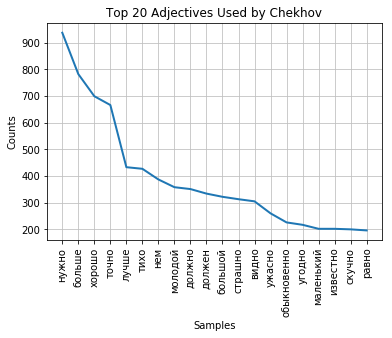

In [264]:
distadjcs = nltk.FreqDist(chekhov_adjcounts)
distadjcs.plot(20, title = "Top 20 Adjectives Used by Chekhov")

Now that I have a list of all the adjectives Chekhov used and their values, I need to narrow the list down to the most frequently used terms and perform analysis on those terms. One slight issue with the way the POS tagger works is that it tags some words as adjectives that are most frequently used as adverbs but could be a short form neuter adjective. 

In [204]:
theText.concordance("больше")#here in the concordance it can be seen that adverb больше is used as adverb, not neuter adj.

Displaying 25 of 1244 matches:
орят а так презирают Новые приятели больше уже ни о чем не говорили Они разошл
еша я влезу Девчонка ты школьница и больше ничего Подсади Лаев с пыхтеньем под
Петр Николаич скоро ли вы Не могу я больше ждать Не могу Дайте мне кончить Ну 
ба не соусы а жаркое Вы какую птицу больше обожаете Товарищ прокурора сделал к
дарь Катар желудка доктора выдумали Больше от вольнодумства да от гордости быв
ренным обманутым не остается ничего больше как брюзжать и походя говорить о то
него неладно и хочется ему говорить больше о себе самом чем о женщинах и что н
стали проводить иначе Я был склонен больше к тихим так сказать идиллическим уд
руг еще зарыдаю Я вышел не сказавши больше ни слова и час спустя уже сидел в в
ь пальто или подаст мне стакан воды Больше я ничего не слышал так как уснул На
 скамьи билетов и кучи бумаг в углу больше ничего нет Ужасная бедность и ужасн
й сидел комик и пил пиво Пил пиво и больше ничего Примечания АНЮТА В самом деш
статься Одним словом 

Utilizing Excel, I have created a table with the adjectives used by Chekhov 100 or more times and sorted them into animate adjectives (those that could describe people), short form adjectives, and adverbs. Interestingly, out of 64 top adjectives, 36 are adverbs. This has caused me to realize I may need to explore Chekhov's adjective use and raises some further interesting research questions, mainly does Chekhov use more adverbs than other Russian authors or is Russian structured such that adverb constructions (often used in impersonal expressions such as "I am cold" or мне холодно) are used more frequently than adjectives. For now, I need to curate a curated list of top adjectives that can be used to describe people and are not adverbs. I did this using my Excel table. 

In [519]:
topadjs = {
    "большая":103,
    "длинные":103,
    "длинный":103,
    "главное":104,
    "честное":107,
    "маленькая":111,
    "разные":111,
    "молодая":112,
    "высокий":126,
    "дорогой":130,
    "старый":137,
    "целый":141,
    "милый":142,
    "большие":146,
    "хороший":153,
    "виноват":154,
    "милая":163,
    "маленький":202,
    "большой":322,
    "молодой":358
    }


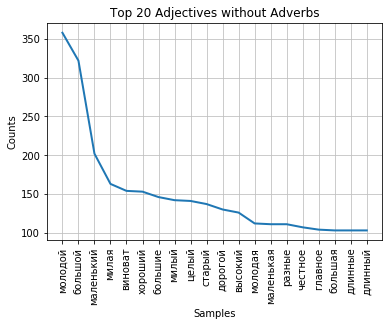

In [520]:
topadjsfreq = nltk.FreqDist(topadjs)
topadjsfreq.plot(20, title="Top 20 Adjectives without Adverbs")

One of the biggest challenges of working with Russian words is that most have multiple forms. I realized that my list of top adjectives includes mostly masculine adjectives. This provides interesting information in and of itself, but it also raises the question of how to count Chekhov's adjective use. Should masculine and feminine adjectives of the same word be counted as one instance or two? What about words in different cases? I used regex to analyze stemmed adjectives in the hopes of getting a better sense of how Chekhov utilizes adjectives in all cases and with all gender endings. This was successful, but as I discovered later in my analysis, led to different problems. 

In [333]:
from nltk.stem.snowball import SnowballStemmer#Russian stemmer
stemmer = SnowballStemmer("russian")
stems = [stemmer.stem(word) for word in topadjs]
def regex_word_count_stem(filestring, word):
    return sum(1 for match in re.finditer(r"\b"+word+r"[a-z]{0,4}", filestring))#look for word boundary, find word with up to 4 letters after
regex_word_count_stem("красивый красный красивые красное", "крас")#by george it works!
for stem in stems: 
    word = stem
    count = regex_word_count_stem(str(listOfTokens), stem)#go through entire text tokens and compare token with stems
    stemsandcounts += word, count
print(stemsandcounts)

('широк', 676, 'широк', 676, 'бел', 1552, 'бессмыслен', 72, 'бледн', 864, 'блестя', 136, 'больничн', 28, 'больн', 1040, 'бос', 224, 'вышит', 16, 'весел', 744, 'внушительн', 40, 'водяночн', 4, 'воен', 160, 'высок', 916, 'вышит', 16, 'громадн', 304, 'груб', 308, 'грустн', 316, 'длин', 1132, 'душист', 36, 'желт', 268, 'жилист', 24, 'заплака', 456, 'здоров', 800, 'здоровен', 16, 'зелен', 520, 'изодра', 0, 'испит', 72, 'испуга', 548, 'коротк', 184, 'красив', 740, 'красн', 1276, 'краснощек', 24, 'кротк', 188, 'кругл', 156, 'кудряв', 76, 'легк', 564, 'лукав', 52, 'лыс', 268, 'маленьк', 1172, 'мелк', 348, 'молод', 2060, 'мрачн', 124, 'мужицк', 72, 'мягк', 380, 'нависш', 48, 'наивн', 168, 'нарядн', 20, 'нахмурен', 24, 'небольш', 212, 'невысок', 64, 'неподвижн', 436, 'несчастн', 444, 'неуклюж', 116, 'нов', 1164, 'остр', 516, 'плоск', 56, 'покойн', 512, 'полн', 884, 'полотнян', 4, 'поношен', 64, 'порядочн', 268, 'постн', 80, 'прим', 636, 'приятн', 516, 'просторн', 64, 'пухл', 152, 'равнодушн', 26

In [335]:
topadjs = {
    "большая":103,
    "длинные":103,
    "длинный":103,
    "главное":104,
    "честное":107,
    "маленькая":111,
    "разные":111,
    "молодая":112,
    "высокий":126,
    "дорогой":130,
    "старый":137,
    "целый":141,
    "милый":142,
    "большие":146,
    "хороший":153,
    "виноват":154,
    "милая":163,
    "маленький":202,
    "большой":322,
    "молодой":358
    }

topadjsstems = {
    "серьезн":576,
    "прим":636,
    "больш":676,
    "широк":676,
    "красив":740,
    "весел":744,
    "здоров":800,
    "бледн":864,
    "полн":884,
    "высок":916,
    "тяжел":984,
    "длин":1132,
    "бел":1152,
    "нов":1164,
    "маленьк":1172,
    "черн":1176,
    "черн":1176,
    "красн":1276,
    "темн":1392,
    "молод":2060,
    "стар":5008
}

Using the analysis from above, I can compare the list of most common adjectives with the list of adjectives found by their stems. The top 10 adjectives by stem are стар, молод, темн, красн, черн, маленьк, нов, бел, длин. The top 10 adjectives (not stemmed) are молодой, большой, маленький, милая, виноват, хороший, большие, милый, целый, старый. All of these adjectives are in the masculine form (except for the notable exception милая or sweet/kind/cute) suggesting Chekhov either utilizes more adjectives to describe men or that he has fewer male characters. This is a question I will investigate below. My next step is to compile stastics looking at the usage of the female versus male usage of these adjectives. 

In [393]:
print("Counts for adjective старый/old in all cases")
print("Masc. nom.", theText.count("старый"))
print("Fem. nom.", theText.count("старая"))
print("Masc. acc/gen.", theText.count("старого"))
print("Fem. dat/gen/prep", theText.count("старой"))
print("Masc. dat", theText.count("старому"))
print("Fem. acc", theText.count("старую"))
print("Masc. inst", theText.count("старым"))
print("Masc. prep", theText.count("старом"))
print("Fem. inst", theText.count("старою"))
print("Plural nom", theText.count("старые"))
print("Plural acc/gen/prep", theText.count("старых"))
print("Plural inst", theText.count("старими"))
print("Plural dat", theText.count("старым"))#same as inst. singular

print("Total masculine = 348")
print("Total feminine = 252")
print("Total use of adjective old to describe people = 780")



Counts for adjective старый/old in all cases
Masc. nom. 212
Fem. nom. 120
Masc. acc/gen. 68
Fem. dat/gen/prep 76
Masc. dat 16
Fem. acc 48
Masc. inst 24
Masc. prep 28
Fem. inst 8
Plural nom 104
Plural acc/gen/prep 52
Plural inst 0
Plural dat 24
Total masculine = 348
Total feminine = 252
Total use of adjective old to describe people = 780


In examining Chekhov's use of the adjective "old" as it is used to describe people, I see that the term is used 780 times. While at first this seems like quite a lot, it is interesting to consider that the corpus only consists of 586 stories. Furthermore, it's helpful to note the discrepancy between the 780 counts I obtained searching for exact matches for the adjective "old" in all its cases for both men and women as compared to the search for the stem "стар" which produced 5008 counts. Of course, there are words with this root that are not adjectives (including quite a few verbs) so perhaps using stems is not the most logical. However, it is useful as I think about the best ways to move forward analyzing Russian texts with DH! Russian's structure is both and blessing and a curse for text analysis.

Using Voyant, I can compare the usage of words with the root стар over the course of the stories. The graph shows that Chekhov uses this term frequently across most of his stories, with some obvious spikes. However, one issue I have noticed in using relative frequencies with someone like Chekhov is that the length of his stories can throw off the analysis, as some of his stories are quite short and the appearance of the word "old" even one time would have relatively high frequency as some stories have as few as 100 words total. For that reason, it is interesting to compare relative frequencies to raw frequencies (as I have done below). 

In [524]:
from IPython.display import IFrame
IFrame("http://127.0.0.1:8887/?corpus=30261348497717d9caab9624fead8c44&query=стар*&view=Trends", width=600, height=700)

In [434]:
from IPython.display import IFrame
IFrame("http://127.0.0.1:8887/?corpus=30261348497717d9caab9624fead8c44&query=стар*&withDistributions=raw&chartType=bar&view=Trends", width=600, height=700)

Comparing relative and raw frequencies, I can see that there are actually some stories where the word "old" is used many more times than in other stories. In the spirit of switching from distant to close reading, I want to look at one story in particular, В овраге or "In the Ravine" to see how Chekhov uses words with the root "стар". According to Voyant, words with the root стар are used 105 times. I have used the NLTK concordance to see exactly which words with this root are causing such a high count. As can be seen below, I found that nouns with the root стар as well as verbs throw off the count dramatically. For example, the noun старик (old man), the nick name of one of the characters in the story, accounts for 62 counts out of 105. This shows me how tenuous word counts can be and the importance of digging deeper before making conclusions. 

In [525]:
chekhovfilesv10 = glob.glob("/Users/kaylinland/llcu612/ChekhovFiles/Vol10/*txt")
#print(chekhovfilesv10)Used to identify what position file was in [1]
ravinetext = read_file(chekhovfilesv10[1])#quick function for reading file text
ravinetexttokens = tokenizer.tokenize(ravinetext.lower())#tokenize and lowercase
ravinetexttokens.count("старый")
ravinetexttokensconcord = nltk.Text(ravinetexttokens)
ravinetexttokensconcord.concordance("старый")
ravinetexttokensconcord.concordance("старого")
ravinetexttokensconcord.concordance("старуха")
ravinetexttokensconcord.concordance("старую")
ravinetexttokensconcord.concordance("старик")#this is the culprit
ravinetexttokensconcord.concordance("старая")


Displaying 4 of 4 matches:
 было похоже что это тоже жаворонок старый работник который проходил мимо крыл
 слышался смех костыль идет костыль старый хрен и эхо тоже смеялось вот и роща
иков вызванных свидетелями выехал и старый работник получивший тоже повестку с
огда она катила мимо лавки спрыгнул старый работник и пошел во двор слышно был
Displaying 1 of 1 matches:
хожих и проезжих разбойники грабили старого и малого а кто водку продавал без п
Displaying 2 of 2 matches:
ествие в семейной жизни померла его старуха софья никифоровна от чахотки помина
 ней пьяные мужики свесив ноги одна старуха вела мальчика в большой шапке и в б
Displaying 1 of 1 matches:
 кто то обменил хорошую поддевку на старую и анисим вдруг вспыхнул и стал крич
Displaying 25 of 62 matches:
 на поминках у фабриканта костюкова старик дьячок увидел среди закусок зернист
сруб давал деньги в рост вообще был старик оборотливый у него было два сына ст
то в амбар то в погреб то в лавку и старик цыбукин глядел на нее весел

Ideally, I would have liked to compare all masculine and feminine adjectives used in Chekhov's work. However, until I find an efficient way of producing all the different forms, this proved to be too time consuming for the purposes of this project, as I had to manually type out each form of each word. I am sure there is a program for use in Russian that would provide all forms of each word. One thing this project has highlighted for me is the need to identify better sources for Russian NLP, something I am excited to do in the future. 

# Sentiment Analysis

Tun identifies 112 adjectives used by Chekkhov to describe outer appearance. They also provide information about how Chekhov uses these adjectives in his stories (positively or negatively). I decided to try my hand at sentiment analysis. First, I was curious just how frequently Chekhov uses the adjectives Tun lists. 

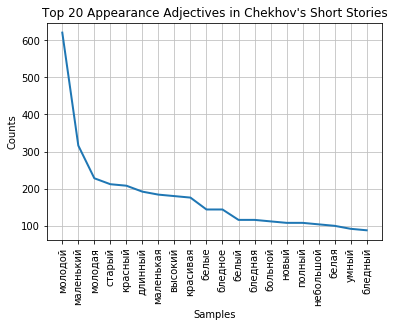

In [521]:
freqdistappearance = nltk.FreqDist(appearanceAdjs)
freqdistappearance.plot(20, title="Top 20 Appearance Adjectives in Chekhov's Short Stories")

In [332]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
stemmedadjs = [stemmer.stem(word) for word in wordList]
stringadjs = str(stemmedadjs)
def regex_word_count_stem(filestring, word):
    return sum(1 for match in re.finditer(r"\b"+word+r"[a-z]{0,4}", filestring))#look for word boundary, find word with up to 4 letters after
regex_word_count_stem("красивый красный красивые красное", "крас")#by george it works!
for stem in stemmedadjs: 
    word = stem
    count = regex_word_count_stem(str(listOfTokens), stem)#go through entire text tokens and compare token with stems
    stemsandcounts += word, count
print(stemsandcounts)

('широк', 676, 'широк', 676, 'бел', 1552, 'бессмыслен', 72, 'бледн', 864, 'блестя', 136, 'больничн', 28, 'больн', 1040, 'бос', 224, 'вышит', 16, 'весел', 744, 'внушительн', 40, 'водяночн', 4, 'воен', 160, 'высок', 916, 'вышит', 16, 'громадн', 304, 'груб', 308, 'грустн', 316, 'длин', 1132, 'душист', 36, 'желт', 268, 'жилист', 24, 'заплака', 456, 'здоров', 800, 'здоровен', 16, 'зелен', 520, 'изодра', 0, 'испит', 72, 'испуга', 548, 'коротк', 184, 'красив', 740, 'красн', 1276, 'краснощек', 24, 'кротк', 188, 'кругл', 156, 'кудряв', 76, 'легк', 564, 'лукав', 52, 'лыс', 268, 'маленьк', 1172, 'мелк', 348, 'молод', 2060, 'мрачн', 124, 'мужицк', 72, 'мягк', 380, 'нависш', 48, 'наивн', 168, 'нарядн', 20, 'нахмурен', 24, 'небольш', 212, 'невысок', 64, 'неподвижн', 436, 'несчастн', 444, 'неуклюж', 116, 'нов', 1164, 'остр', 516, 'плоск', 56, 'покойн', 512, 'полн', 884, 'полотнян', 4, 'поношен', 64, 'порядочн', 268, 'постн', 80, 'прим', 636, 'приятн', 516, 'просторн', 64, 'пухл', 152, 'равнодушн', 26

I tried using the stemming method to gain a better sense of Chekhov's use of adjectives to describe people (as the list in Tun's dissertation was all given in the masculine singular nominative). Unfortunately, I ended up having to manually type out feminine versions of the adjectives in the list I used later in the process because I realized the stemming method is too subject to variation and picking up words that are not adjectives. 

In [522]:
text2use = "alltexts.txt"#code obviously borrowed from Art of Literary Text Analysis Notebook, create one string with all text
with open(text2use, "r") as fileToRead: 
    theString = fileToRead.read()
listOfTokens = tokenizer.tokenize(theString.lower())
theText = nltk.Text(listOfTokens)

In [523]:
theText.count("она")#count number of times adj occurs in text 

10384

In [246]:
def simple_counter(wordList, text): #function counts how many times a word in a list appears in a string
    worddict = dict()
    for word in wordList: 
        wordcount = text.count(word)
        worddict.update({word:text.count(word)})
    return worddict

In [500]:
wordList = "белый", "белая", "белое", "белые", "бессмысленный", "бессмысленная", "бессмысленное", "бессмысленные", "бледный", "бледная", "бледное", "бледные","блестящий", "блестящая", "блестящее", "блестящие", "больничный", "больничная", "больничное", "больничные", "больной", "больная", "больные", "больное", "босой", "босая", "босое", "босые", "вышитый", "веселый", "веселая", "веселые", "веселое","внушительный", "внушительная", "внушительные", "внушительное", "водяночный", "военный", "высокий", "вышитый", "громадный", "грубый", "грубая", "грубые", "грубое", "грустный", "грустная", "длинный", "душистый", "желтый", "жилистый", "заплаканный", "заплаканная", "здоровый", "здоровая", "здоровенный", "зеленый", "изодранный", "испитый", "испуганный", "короткий", "красивый", "красивая", "красный", "краснощекий", "кроткий", "круглый", "кудрявый", "легкий", "легкая", "лукавый", "лукавая", "лысый", "маленький", "маленькая", "мелкий", "мелкая", "молодой", "молодая", "мрачный", "мужицкий", "мягкий", "нависший", "наивный", "нарядный", "нахмуренный", "небольшой", "невысокий", "неподвижный", "несчастный", "неуклюжий", "новый", "острый", "плоский", "покойный", "полный", "полотняный", "поношенный", "порядочный", "постный", "примой", "приятный", "просторный", "пухлый", "равнодушный", "распущенный", "роскошный", "рыжий", "седой", "серьезный", "синий", "ситцевый", "скромный", "скуластый", "слабый", "смуглый", "солидный", "старый", "стройный", "суровой", "сутулый", "сухощавый", "темный", "толстый", "тонкий", "тучный", "тупой", "тяжёлый", "умный", "хищный", "худенький", "худощавый", "черный", "чернобровый", "чёрный", "широкий"
appearanceAdjs = simple_counter(wordList, theText)
wordstostem = "белый бессмысленный бледный блестящий больничный больной босой вышитый веселый внушительный водяночный военный высокий вышитый громадный грубый грустный длинный душистый желтый жилистый заплаканный здоровый здоровенный зеленый изодранный испитый испуганный короткий красивый красный краснощекий кроткий круглый кудрявый легкий лукавый лысый маленький мелкий молодой мрачный мужицкий мягкий нависший наивный нарядный нахмуренный небольшой невысокий неподвижный несчастный неуклюжий новый острый плоский покойный полный полотняный поношенный порядочный постный примой приятный просторный пухлый равнодушный распущенный роскошный рыжий седой серьезный синий ситцевый скромный скуластый слабый смуглый солидный старый стройный суровой сутулый сухощавый темный толстый тонкий тучный тупой тяжёлый умный хищный худенький худощавый черный чернобровый чёрный широкий"

In [501]:
import operator 
print(appearanceAdjs)
sortedadjs = sorted(appearanceAdjs.items(), key=operator.itemgetter(1)) 


{'белый': 116, 'белая': 100, 'белое': 52, 'белые': 144, 'бессмысленный': 8, 'бессмысленная': 4, 'бессмысленное': 12, 'бессмысленные': 0, 'бледный': 88, 'бледная': 116, 'бледное': 144, 'бледные': 64, 'блестящий': 8, 'блестящая': 4, 'блестящее': 4, 'блестящие': 48, 'больничный': 4, 'больничная': 0, 'больничное': 0, 'больничные': 0, 'больной': 112, 'больная': 28, 'больные': 72, 'больное': 24, 'босой': 24, 'босая': 40, 'босое': 0, 'босые': 20, 'вышитый': 0, 'веселый': 60, 'веселая': 40, 'веселые': 24, 'веселое': 8, 'внушительный': 4, 'внушительная': 8, 'внушительные': 0, 'внушительное': 0, 'водяночный': 4, 'военный': 36, 'высокий': 180, 'громадный': 40, 'грубый': 32, 'грубая': 8, 'грубые': 16, 'грубое': 12, 'грустный': 20, 'грустная': 8, 'длинный': 192, 'душистый': 12, 'желтый': 24, 'жилистый': 4, 'заплаканный': 4, 'заплаканная': 24, 'здоровый': 76, 'здоровая': 52, 'здоровенный': 8, 'зеленый': 56, 'изодранный': 0, 'испитый': 0, 'испуганный': 12, 'короткий': 16, 'красивый': 84, 'красивая': 

Above I have compiled a list of all the appearance adjectives listed in Tun's dissertation and their appearance in Chekhov's work. Some of the adjectives are listed as appearing zero times; I believe this is due to the fact that the adjectives are listed in the nominative masculine form and thus may appear with other gender endings and/or in other cases. Again, this is a big issue in using Russian text. 

Here we can see that the most frequently used adjective descriptors Chekhov uses to describe people are "young (masc.)", "small (masc.)", "young (fem.)", "old (masc.)", "red (masc.)", "long (masc.)", "small (fem.)", and "tall (masc.). Of course, these are only the most frequently used adjectives from a curated list of adjectives that could be used to describe people, not all adjectives. Furthermore, it's important to note that while the adjectives could be used as descriptors of animate objects, they are not necessarily being used in that way. In other words, there could be many "red" things in the text that are not people that are throwing off the analysis. 

In the dissertation from which I took the appearance adjectives, it is suggested that certain appearance adjectives are encoded as either positive or negative either in the Russian cultural tradition or in Chekhov's work. I was inspired to try some basic sentiment analysis using this logic. Without going into too much detail, I will list the sentiment for each adjective (positive or negative as described in the dissertation) below (following the Jupyter notebook guide). I've chosen to give them in the nominative form (for all three genders and plurals) only for the sake of brevity. I am learning that this is one of the major challenges in Russian NLP. 

In [503]:
short_sentiments = {
    "pos": {
        "белый": 0,#white, usually used to describe face. Neutral association
        "белое": 0,
        "белая": 0,
        "белые": 0,
        "блестящий": .25, #slightly positive, shining 
        "блестящая": .25,
        "блестящее": .25,
        "блестящие": .25,
        "босой": 0, #barefoot, could be positive or negative (thus only including masculine)
        "бритый": .1,#slightly positive, given only in masculine and neuter (because refers only to male or to face)
        "бритое": .1,
        "беселый": 1,#cheerful, happy
        "беселая": 1,
        "беселое": 1,
        "беселые": 1,
        "здоровый": 1,#healthy
        "здоровая": 1, 
        "здоровое": 1, 
        "здоровые": 1,
        "здоровенный": .5,#large, healthy sized
        "здоровенная": .5, 
        "здоровенное": .5, 
        "здоровенные": .5,
        "красный": .5, #red, sometimes positive
        "красная": .5, 
        "красное": .5, 
        "красные": .5,
        "молодой": .25, #young, usually positive
        "молодая": .25, 
        "молодое": .25, 
        "молодые": .25,
        "мягкий": .25, #soft
        "мягкая": .25, 
        "мякое": .25, 
        "мякие": .25,
        "скромный": .75, #modest
        "скромная": .75,
        "скромное": .75, 
        "скромные": .75,
        "приятный": 1, #pleasant
        "приятная": 1, 
        "приятное": 1, 
        "приятные": 1,
        "умный": 1, #smart
        "умная": 1, 
        "умное": 1, 
        "умные": 1,        
    },
    "neg": {
        "бледный": -.5,#white but with association meaning pale or sickly
        "бледное": -.5,
        "бледная": -.5, 
        "бледные": -.5,
        "больничный": -1,#sickly, related to hospital
        "больничная": -1,
        "больничное": -1,
        "больничные": -1,
        "больной": -1, #sick/ill
        "больная": -1, 
        "больное": -1, 
        "больные": -1,
        "грубый": -1,#rude
        "грубая": -1, 
        "грубое": -1, 
        "грубые": -1,
        "грустный": -1,#sad
        "грустная": -1,
        "грустное": -1, 
        "грустные": -1,
        "жилистый": -1,#thin, sinewy
        "жилистая": -1,
        "жилистое": -1,
        "жилистые": -1,
        "заплаканный": -1,#crying
        "заплаканная": -1,
        "заплаканное": -1, 
        "заплаканные": -1,
        "испитой": -.75,#thin, gaunt, emaciated 
        "испитое": -.75, 
        "испитая": -.75,
        "испитые": -.75,
        "изодранный": -1, #torn up (of clothes)
        "изодранная": -1, 
        "изодранное": -1, 
        "изодранные": -1,
        "испуганный": -1, #scared, frightened
        "испуганная": -1, 
        "испуганное": -1, 
        "испуганные": -1,
        "лукавый": -.5, #crafty, cunning
        "лукавая": -.5, 
        "лукавое": -.5, 
        "лукавые": -.5,
        "маленькое": -.1,#small, slightly negative
        "маленькая": -.1,
        "маленький": -.1,
        "маленькие": -.1,
        "мелький": -.1,#small/dainty, slightly negative
        "мелькое": -.1,
        "мелькая": -.1,
        "мелькие": -.1,
        "наивный": -1, #naive
        "наивная": -1, 
        "наивные": -1, 
        "наивное": -1, 
        "скуластый": -.1,#large check bones, seen as negative and only used to describe males and faces
        "скуластое": -.1,
        "бессмысленный": -1,#without sense, always negative
        "бессмысленная": -1,
        "бессмысленное": -1,
        "бессмысленные": -1,
        "мрачный": -1, #dark/sullen, always negative
        "мрачная": -1,
        "мрачное": -1,
        "мрачные": -1,
        "несчастный": -1, #unlucky/unhappy, always negative
        "несчастная": -1,
        "несчастное": -1,
        "несчастные": -1,
        "острый": -1, #biting, acerbic 
        "острая": -1, 
        "острое": -1, 
        "острые": -1,
        "полный": -.5, #full, large
        "полная": -.5, 
        "полное": -.5, 
        "полные": -.5,
        "равнодушный": -1, #apathetic/disinterested, always negative 
        "равнодушная": -1, 
        "равнодушное": -1,
        "равнодушные": -1,
        "слабый": -1, #weak
        "слабая": -1, 
        "слабые": -1, 
        "слабое": -1,
        "суровый": -1, #harsh/rough, always negative
        "суровая": -1,
        "суровое": -1,
        "суровые": -1,
        "темный": -1, #dark (as in personality)
        "темная": -1, 
        "темное": -1, 
        "темные": -1,
        "толстый": -1, #fat
        "толстая": -1, 
        "толстое": -1, 
        "толстые": -1, 
        "тонкий": -.1, 
        "тонкая": -.1, #thin
        "тонкое": -.1, 
        "тонкие": -.1,
        "хищный": -1, #greedy, always negative
        "хищная": -1,
        "хищное": -1,
        "хищные": -1, 
    }
}

In [504]:
documents_sentiment = {}
for fileid in ChekhovCorpus.fileids():
    text = ChekhovCorpus.raw(fileid).lower()
    tokens = nltk.word_tokenize(text)
    score = 0
    for polarity, words_dict in short_sentiments.items():
        for word, value in words_dict.items():
            score += tokens.count(word) + value
    documents_sentiment[fileid] = score

In [506]:
valuesFreqs = nltk.FreqDist(documents)
mostpositive = valuesFreqs.max()
print(mostpositive)#print text with highest value 

ДРАМА НА ОХОТЕ.unknown.txt


In [507]:
import operator
sorted_documents_sentiment = sorted((value, key) for (key,value) in documents_sentiment.items())#this sorts a dict
pprint.pprint(sorted_documents_sentiment)

[(-60.2, '3000 ИНОСТРАННЫХ СЛОВ.unknown.txt'),
 (-60.2, 'БАРАН И БАРЫШНЯ.unknown.txt'),
 (-60.2, 'БИБЛИОГРАФИЯ.unknown.txt'),
 (-60.2, 'В ПАНСИОНЕ.unknown.txt'),
 (-60.2, 'ВАНЬКА.unknown.txt'),
 (-60.2, 'ВВЕРХ ПО ЛЕСТНИЦЕ.unknown.txt'),
 (-60.2, 'ВИЗИТНЫЕ КАРТОЧКИ.unknown.txt'),
 (-60.2, 'ВОПРОСЫ И ОТВЕТЫ.unknown.txt'),
 (-60.2, 'ВРАЧЕБНЫЕ СОВЕТЫ.unknown.txt'),
 (-60.2, 'ВЫВЕСКА.unknown.txt'),
 (-60.2, 'ГАДАЛЬЩИКИ И ГАДАЛЬЩИЦЫ.unknown.txt'),
 (-60.2, 'ГРАЧ.unknown.txt'),
 (-60.2, 'ДАЧНЫЕ ПРАВИЛА.unknown.txt'),
 (-60.2, 'ДВА ГАЗЕТЧИКА.unknown.txt'),
 (-60.2, 'ДВА ПИСЬМА.unknown.txt'),
 (-60.2, 'ДВАДЦАТЬ ШЕСТЬ.unknown.txt'),
 (-60.2, 'ДЕЛЕЦ.unknown.txt'),
 (-60.2, 'ДЕЛО О 1884 ГОДЕ.unknown.txt'),
 (-60.2, 'ДОБРОДЕТЕЛЬНЫЙ КАБАТЧИК.unknown.txt'),
 (-60.2, 'ДОБРЫЙ ЗНАКОМЫЙ.unknown.txt'),
 (-60.2, 'ДОМАШНИЕ СРЕДСТВА.unknown.txt'),
 (-60.2, 'ДОНЕСЕНИЕ.unknown.txt'),
 (-60.2, 'ДРАМАТУРГ.unknown.txt'),
 (-60.2, 'ЖАЛОБНАЯ КНИГА.unknown.txt'),
 (-60.2, 'ЖЕНИХ И ПАПЕНЬКА.unknown.txt'),
 (-60.2, 'Ж

Looking at the results of the sentiment analysis, I see that quite a few of the stories have the same negative score (-60.2). I am guessing this is because each of the words in the list of positive and negative adjectives may not appear enough times to make significant differentiation between Chekhov's stories. However, the overwhelmingly negative descriptions of people in Chekhov's work is interesting and fits with the general sentiment of Chekhov's work. I am curious to look at the stories that were highly positive, especially "The Steppe". This story is not exactly chipper so I am thinking my sentiment analysis would need significant development before I could comfortably say it predicts sentiment at large. However, this analysis only looks at adjectives that describe characters, so it is possible that the positive stories have more positively described characters than the others. The Huntsmen (Драма на охоте) has the largest score but is also the longest work by Chekhov, so I am going to rule that one out. I will look at Степь (The Steppe) to see what can be revealed. 

In [511]:
chekhovfilesv7 = glob.glob("/Users/kaylinland/llcu612/ChekhovFiles/Vol7/*txt")
steppe = read_file(chekhovfilesv7[9])
steppetexttokens = tokenizer.tokenize(steppe.lower())
steppetexttokensconcord = nltk.Text(steppetexttokens)
simple_counter(wordList, steppetexttokens)


{'белый': 1,
 'белая': 2,
 'белое': 2,
 'белые': 5,
 'бессмысленный': 0,
 'бессмысленная': 0,
 'бессмысленное': 0,
 'бессмысленные': 0,
 'бледный': 0,
 'бледная': 1,
 'бледное': 1,
 'бледные': 0,
 'блестящий': 0,
 'блестящая': 0,
 'блестящее': 0,
 'блестящие': 1,
 'больничный': 0,
 'больничная': 0,
 'больничное': 0,
 'больничные': 0,
 'больной': 1,
 'больная': 1,
 'больные': 3,
 'больное': 1,
 'босой': 1,
 'босая': 1,
 'босое': 0,
 'босые': 0,
 'вышитый': 0,
 'веселый': 0,
 'веселая': 5,
 'веселые': 0,
 'веселое': 0,
 'внушительный': 1,
 'внушительная': 0,
 'внушительные': 0,
 'внушительное': 0,
 'водяночный': 0,
 'военный': 0,
 'высокий': 1,
 'громадный': 0,
 'грубый': 0,
 'грубая': 0,
 'грубые': 0,
 'грубое': 1,
 'грустный': 1,
 'грустная': 0,
 'длинный': 6,
 'душистый': 0,
 'желтый': 0,
 'жилистый': 0,
 'заплаканный': 0,
 'заплаканная': 1,
 'здоровый': 1,
 'здоровая': 0,
 'здоровенный': 0,
 'зеленый': 1,
 'изодранный': 0,
 'испитый': 0,
 'испуганный': 1,
 'короткий': 1,
 'красивый':

Looking at the print out of sentiment words that  occur in "The Steppe", I see that красный (red) appears 6 times, and маленький (small) occurs 8 times. Веселая (happy) appears 6 times and красивая appears 5 times. All of these words are coded positively, which explains the high score. To get a better idea of the context of these words, I will use the concordance tool. 

In [526]:
steppetexttokensconcord.concordance("красный")

Displaying 5 of 5 matches:
т глазами кумачовую рубаху егорушки красный ли цвет ей понравился или вспомнила
 кумачовую рубаху егорушки и бричку красный цвет рубахи манил и ласкал его а бр
ет он и сам не заметил как приятный красный цвет и любопытство притянули его из
ещенных половин в одной продавались красный товар и бакалея а в другой стояли б
о где то на большой дороге светился красный огонек тоже вероятно кто нибудь вар


I can see above that the four occurances of красный (pretty) are used in reference to inanimate objects (color, items, and fire). This is one challenge with using sentiment analysis based on animate adjectives and one possible explanation for the positive encoding of this story and others that have largely negative plots. 

In [527]:
steppetexttokensconcord.concordance("веселая")

Displaying 5 of 5 matches:
 на его лице казалось что и хорошая веселая мысль застыла в его мозгу от жары а
да она падала на землю и прозрачная веселая сверкающая на солнце и тихо ворча т
 войлоке и стали закусывать хорошая веселая мысль застывшая от жары в мозгу о х
ах своей старости в ней поднимается веселая молодая трескотня какой не бывает д
возле него постоянно живет ласковая веселая и красивая женщина пришла ему почем


I see the same issue with веселая (happy). Here happy is used to describe happy thoughts, happy animals, and happy people. 

# Conclusions and Lessons Learned 

In terms of the textual analysis I was able to perform, I would say this project proved far more useful as a learning experience for me than as actual literary analysis. While I was able to make some basic conclusions about Chekhov's use of adjectives, I was not able to perform the large-scale structuralist analysis of Chekhov's adjective usage I had in mind when I proposed the project (which I now see was overly ambitious). That being said, the biggest take-aways I have from the project are as follows: 
1. Russian NLP requires Russian-specific tools. I was able to use MyStem and its Python module successfully and this will prove useful for future POS tagging in Russian. I am still wrestling with a way to use the Russian version of WordNet in Python. 
2. The structure of Russian raises interesting questions about how to analize individual words that have different forms in different cases and with different gender endings. I need to investigate tools for dealing with this. 
3. Using short stories to calculate relative frequencies of word usage is tenuous at best, as a single usage of a word results in a high relative frequency of usage that may not be significant. 
4. Sentiment analysis is only as good as the words you utilize to make the analysis. It would be interesting to analyze Chekhov's work with a larger set of terms. 

Were I to continue this line of inquiry, I would like to explore Chekhov's work in comparison with another Russian author's work to see if Chekhov's usage of adjectives is unique. I would also like to explore the gender question in more detail. At a larger scale, this project has highlighted the difficulty of using computational analysis to make sense of an author like Chekhov, who does not necessarily utilize language or plot in a typical way. I believe studying the structure of Chekhov's stories provides a unique opportunity to test digital humanities methodology and this preliminary work was highly instructive for me!